In [24]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [21]:
project_dir = "/home/julien/Documents/stage/data/MIMIC/cohorts_new"
file_name = "patient_mimic_format_preprocessed.csv"
pcas = []
columns = []

for patient_id in os.listdir(project_dir):
    for encounter_id in os.listdir(os.path.join(project_dir, patient_id)):
        print(patient_id)
        
        df_path = os.path.join(project_dir, patient_id, encounter_id, "saves", file_name)
        try:
            df = pd.read_csv(df_path, low_memory=False)
        except pd.errors.EmptyDataError:
            warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df is empty: {df_path}")
        except FileNotFoundError:
            warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")
        
        df_interest_start = max(30, int(len(df) * 0.01))
        window_length_fit = max(30, int(len(df) * 0.1))
    
    
        print(f"df_interest_start: {df_interest_start}, window_length: {window_length_fit}")
    
        non_medical_columns = ["index", "time", "patient_id", "row_number", "encounter_id"]
        df_patient_medical_data = df.drop(non_medical_columns, axis=1)
    
        fit_data = df_patient_medical_data.iloc[df_interest_start:df_interest_start + window_length_fit]
        fit_keys = list(fit_data.keys())
        # print(fit_data.keys())
        scaler = StandardScaler()
        try:
            fit_data = scaler.fit_transform(fit_data)
        except ValueError:
            warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this fit data is invalid")
            print(fit_data)
    
    
        # PCA step
        n_pca_components = min(10, len(fit_keys))  # Set to 10 or the number of available features, whichever is smaller
        pca = PCA(n_components=n_pca_components)
        fit_data = pca.fit_transform(fit_data)
        pcas.append(pca)
        columns.append(fit_keys)

2279
df_interest_start: 30, window_length: 95
20679
df_interest_start: 30, window_length: 95
5598
df_interest_start: 30, window_length: 265
8410
df_interest_start: 57, window_length: 576


/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 20679 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/20679/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


14599
df_interest_start: 30, window_length: 171
9787
df_interest_start: 30, window_length: 131
14475
df_interest_start: 30, window_length: 239
2784
df_interest_start: 30, window_length: 239
19310
df_interest_start: 30, window_length: 201
19842
df_interest_start: 30, window_length: 193
28878


/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 2784 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/2784/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


df_interest_start: 256, window_length: 2567
27231
df_interest_start: 605, window_length: 6051
25228
df_interest_start: 61, window_length: 619
15227
df_interest_start: 61, window_length: 619


/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 15227 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/15227/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


26542
df_interest_start: 141, window_length: 1412
15631
df_interest_start: 37, window_length: 374
14792
df_interest_start: 190, window_length: 1907
5850
df_interest_start: 30, window_length: 103
20778
df_interest_start: 30, window_length: 82
24887
df_interest_start: 30, window_length: 84
15674
df_interest_start: 30, window_length: 283
2553
df_interest_start: 591, window_length: 5912
15201
df_interest_start: 132, window_length: 1321
15129
df_interest_start: 30, window_length: 30
2743
df_interest_start: 30, window_length: 266
14898


/home/julien/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: divide by zero encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/julien/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


df_interest_start: 285, window_length: 2859
28323
df_interest_start: 35, window_length: 359
27652
df_interest_start: 140, window_length: 1409
22029
df_interest_start: 30, window_length: 280
8291
df_interest_start: 71, window_length: 712
5280
df_interest_start: 30, window_length: 92
5749
df_interest_start: 49, window_length: 497
14497
df_interest_start: 38, window_length: 382
25258
df_interest_start: 38, window_length: 382


/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 25258 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/25258/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


20028
df_interest_start: 159, window_length: 1592
24067
df_interest_start: 83, window_length: 830
29050
df_interest_start: 30, window_length: 223
1593
df_interest_start: 117, window_length: 1176
9169
df_interest_start: 210, window_length: 2100
1234
df_interest_start: 30, window_length: 190
7819
df_interest_start: 30, window_length: 61
23699
df_interest_start: 54, window_length: 541
15903
df_interest_start: 69, window_length: 696
22780
df_interest_start: 69, window_length: 696
3791


/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 22780 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/22780/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


df_interest_start: 244, window_length: 2446
8769
df_interest_start: 72, window_length: 727
17505
df_interest_start: 30, window_length: 181
19911
df_interest_start: 631, window_length: 6314
19793
df_interest_start: 30, window_length: 81
19535
df_interest_start: 101, window_length: 1014
6751
df_interest_start: 30, window_length: 34
24956
df_interest_start: 30, window_length: 68
27051
df_interest_start: 213, window_length: 2130


/home/julien/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: divide by zero encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/julien/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


23789
df_interest_start: 30, window_length: 272
19731
df_interest_start: 82, window_length: 825
9204
df_interest_start: 68, window_length: 684
1386
df_interest_start: 343, window_length: 3436
21776
df_interest_start: 483, window_length: 4830
7476
df_interest_start: 54, window_length: 541
15624
df_interest_start: 99, window_length: 998
681
df_interest_start: 30, window_length: 72
24535
df_interest_start: 62, window_length: 621
5039
df_interest_start: 154, window_length: 1544
17372
df_interest_start: 30, window_length: 298
4246
df_interest_start: 30, window_length: 274
18637
df_interest_start: 34, window_length: 348
25198
df_interest_start: 135, window_length: 1357
8734
df_interest_start: 65, window_length: 652
10029
df_interest_start: 30, window_length: 265
24379
df_interest_start: 402, window_length: 4024
2222
df_interest_start: 580, window_length: 5806
22540
df_interest_start: 30, window_length: 161
2265
df_interest_start: 115, window_length: 1153
2265
df_interest_start: 164, window_l

/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 6042 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/6042/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


df_interest_start: 42, window_length: 426
6863
df_interest_start: 56, window_length: 567
15997
df_interest_start: 167, window_length: 1677
8502
df_interest_start: 114, window_length: 1149
6005
df_interest_start: 88, window_length: 881
14774
df_interest_start: 150, window_length: 1506
22058
df_interest_start: 30, window_length: 96
1063
df_interest_start: 115, window_length: 1159
14906
df_interest_start: 140, window_length: 1407
26528
df_interest_start: 30, window_length: 243
15891
df_interest_start: 30, window_length: 245
18251
df_interest_start: 30, window_length: 201
20587
df_interest_start: 182, window_length: 1826
7400
df_interest_start: 74, window_length: 742
26133
df_interest_start: 241, window_length: 2419
9653
df_interest_start: 80, window_length: 802
6588
df_interest_start: 56, window_length: 562
7702
df_interest_start: 30, window_length: 192
21488
df_interest_start: 61, window_length: 612
25016
df_interest_start: 114, window_length: 1147
24282
df_interest_start: 30, window_len

/home/julien/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:559: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


df_interest_start: 73, window_length: 731
5328
df_interest_start: 110, window_length: 1109
906
df_interest_start: 103, window_length: 1030
1092
df_interest_start: 95, window_length: 957
16439
df_interest_start: 79, window_length: 796
8996
df_interest_start: 102, window_length: 1023
368
df_interest_start: 30, window_length: 140
4137
df_interest_start: 53, window_length: 538
19995
df_interest_start: 45, window_length: 457
19981
df_interest_start: 30, window_length: 174
5748
df_interest_start: 341, window_length: 3417
26521
df_interest_start: 52, window_length: 522
21322
df_interest_start: 70, window_length: 709
5609
df_interest_start: 34, window_length: 349
20790
df_interest_start: 105, window_length: 1054
22658
df_interest_start: 74, window_length: 748
21979
df_interest_start: 30, window_length: 245
6690
df_interest_start: 64, window_length: 642
24926
df_interest_start: 101, window_length: 1010
19552
df_interest_start: 44, window_length: 444
117
df_interest_start: 258, window_length: 25

/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 4395 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/4395/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


8493
df_interest_start: 30, window_length: 120
28471
df_interest_start: 30, window_length: 202
26673
df_interest_start: 30, window_length: 233
22418
df_interest_start: 59, window_length: 599
7204
df_interest_start: 91, window_length: 913
24800
df_interest_start: 59, window_length: 594
19195
df_interest_start: 64, window_length: 649
22303
df_interest_start: 247, window_length: 2474
16344
df_interest_start: 49, window_length: 497
18006
df_interest_start: 30, window_length: 165
19792
df_interest_start: 33, window_length: 339
17837
df_interest_start: 30, window_length: 81
24746
df_interest_start: 380, window_length: 3808
28013
df_interest_start: 30, window_length: 136
27662
df_interest_start: 81, window_length: 815
4766
df_interest_start: 49, window_length: 490
22330
df_interest_start: 56, window_length: 568
9186
df_interest_start: 265, window_length: 2655
22094
df_interest_start: 38, window_length: 384
4394
df_interest_start: 124, window_length: 1249
26519
df_interest_start: 268, window_l

/tmp/ipykernel_145430/1524256425.py:16: UserWarning: Skipping patient 10168 encounter 0 bc this df was not found: /home/julien/Documents/stage/data/MIMIC/cohorts_new/10168/0/saves/patient_mimic_format_preprocessed.csv
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this df was not found: {df_path}")


df_interest_start: 171, window_length: 1712
6720
df_interest_start: 30, window_length: 191
8898
df_interest_start: 139, window_length: 1395
6014
df_interest_start: 30, window_length: 135
16536
df_interest_start: 39, window_length: 397
4715
df_interest_start: 30, window_length: 30
Empty DataFrame
Columns: []
Index: []


/tmp/ipykernel_145430/1524256425.py:34: UserWarning: Skipping patient 4715 encounter 0 bc this fit data is invalid
  warnings.warn(f"Skipping patient {patient_id} encounter {encounter_id} bc this fit data is invalid")


ValueError: at least one array or dtype is required

In [19]:
# Get the PCA loadings (feature importance)
loadings = pca.components_

# Create a DataFrame with feature names
feature_importance_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=fit_keys)

# Print the loadings to see the feature importance for each PC
print(feature_importance_df)

                               PC1           PC2           PC3           PC4  \
Temperature F         0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00   
Art.pH                5.551115e-17  0.000000e+00  5.551115e-17  0.000000e+00   
O2 Flow (lpm)        -0.000000e+00  8.326673e-17  2.289835e-16 -1.665335e-16   
GCS Total            -2.775558e-17  5.551115e-17  0.000000e+00  7.892992e-17   
Sodium (135-148)     -0.000000e+00 -1.110223e-16 -2.081668e-17  0.000000e+00   
NBP [Diastolic]       3.598650e-01  6.630622e-02  7.902822e-01  4.103710e-01   
NBP [Systolic]        5.193831e-01  2.357547e-01  1.512082e-01 -2.898402e-01   
NBP Mean              5.092349e-01  2.410661e-01 -3.432882e-01 -1.246966e-01   
Braden Score         -3.352716e-47 -3.705778e-45 -2.134791e-45  1.423194e-46   
Respiratory Rate     -3.100415e-01  4.792908e-01  3.639463e-01 -6.824801e-01   
SpO2                 -9.844671e-02 -7.063668e-01  3.059947e-01 -3.578141e-01   
calprevflg           -0.000000e+00  0.00

<Figure size 1000x600 with 0 Axes>

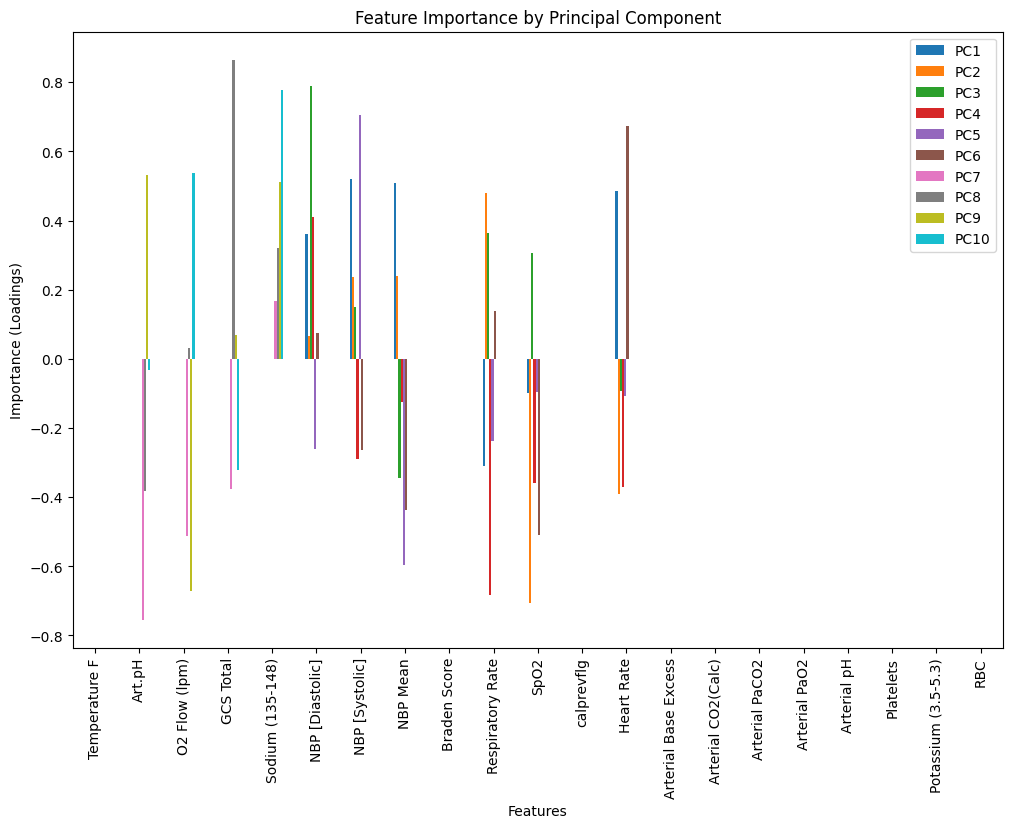

In [20]:
# Visualize feature importance for each component
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Importance by Principal Component')
plt.xlabel('Features')
plt.ylabel('Importance (Loadings)')
plt.xticks(rotation=90)
plt.show()

In [28]:
pca = pcas[0]
pca.components_[0]

array([ 0.00000000e+00,  5.55111512e-17, -0.00000000e+00, -2.77555756e-17,
       -0.00000000e+00,  3.59864984e-01,  5.19383104e-01,  5.09234859e-01,
       -3.35271605e-47, -3.10041458e-01, -9.84467125e-02, -0.00000000e+00,
        4.85387250e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [25]:
# Assuming pca_list is a list of PCA objects and column_names are the features used
# Extract the loadings for the first principal component (PC1)
loading_matrix = np.array([pca.components_[0] for pca in pcas])  # shape: (num_patients, num_features)

# Create a DataFrame for easier manipulation
loading_df = pd.DataFrame(loading_matrix, columns=columns)

# Compute correlations between features across patients
feature_corr = loading_df.corr()

# Plot a heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(feature_corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Perform hierarchical clustering on the features
Z = linkage(feature_corr, 'ward')  # linkage for hierarchical clustering

# Plot the dendrogram for feature clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Features)')
plt.show()

# Perform clustering on patients based on their loadings
clustering = AgglomerativeClustering(n_clusters=3)  # You can choose the number of clusters
patient_clusters = clustering.fit_predict(loading_matrix)

# Visualize the patient clusters (optional, reduce to 2D/3D using PCA)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (211,) + inhomogeneous part.

0
100
Index(['NBP [Systolic]', 'NBP Mean', 'Heart Rate', 'NBP [Diastolic]',
       'Respiratory Rate', 'SpO2', 'Art.pH', 'GCS Total', 'Braden Score',
       'Arterial BP Mean'],
      dtype='object') Index(['Arterial PaCO2', 'Arterial pH', 'Arterial PaO2', 'Art.pH',
       'Arterial Base Excess', 'Arterial CO2(Calc)', 'Arterial BP Mean',
       'SpO2', 'Heart Rate', 'Temperature F'],
      dtype='object')


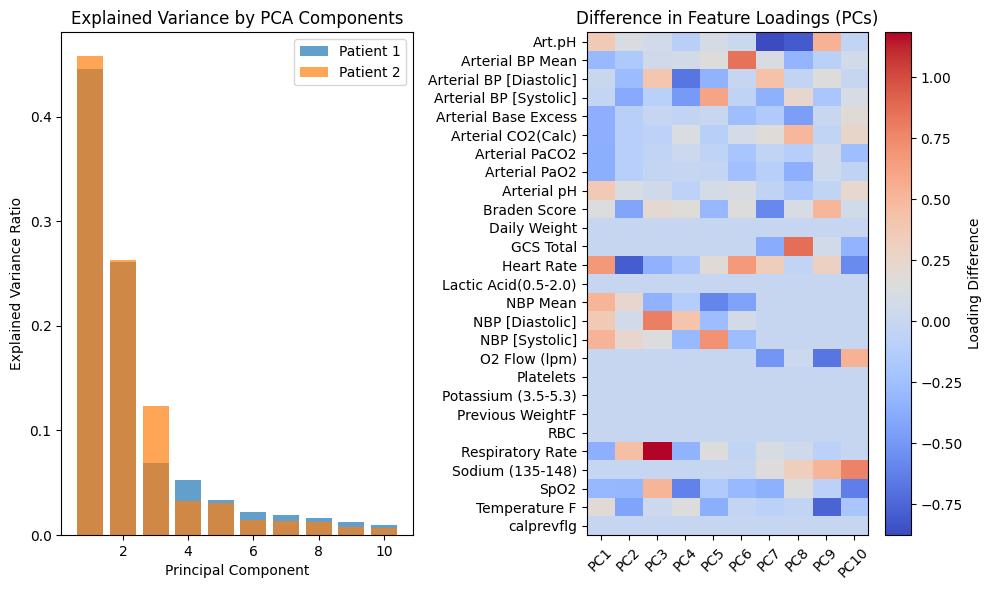

In [48]:
patient1 = np.random.randint(0, len(pcas))
patient2 = np.random.randint(0, len(pcas))

patient1 = 0
patient2 = 100

print(patient1)
print(patient2)

pca1 = pcas[patient1]
pca2 = pcas[patient2]
columns1 = columns[patient1]
columns2 = columns[patient2]

# Extract the principal component loadings (components_ attribute)
loadings1 = pd.DataFrame(pca1.components_, columns=columns1)
loadings2 = pd.DataFrame(pca2.components_, columns=columns2)


# print(f"patient 1 has {len(columns1)} columns and patient 2 has {len(columns2)} columns.")
# print(f"They have {len(sorted(list(set(columns1) & set(columns2))))} columns in common")

# Align the features: Create a combined feature set
combined_columns = sorted(list(set(columns1) | set(columns2)))

# print(f"Combined columns: {combined_columns}")
# print(f"Patient 1 has {len([column for column in columns1 if column in combined_columns])} of the combined columns")
# print(f"Patient 2 has {len([column for column in columns2 if column in combined_columns])} of the combined columns")

# Reindex the loadings to include the combined feature set, filling missing values with 0
loadings1_aligned = loadings1.reindex(combined_columns, axis=1).fillna(0)
loadings2_aligned = loadings2.reindex(combined_columns, axis=1).fillna(0)

pc1_loadings1 = loadings1_aligned.iloc[0]
pc1_loadings2 = loadings2_aligned.iloc[0]

top_features1 = pc1_loadings1.abs().nlargest(10).index
top_features2 = pc1_loadings2.abs().nlargest(10).index

print(top_features1, top_features2)
# loadings1_aligned = loadings1_aligned[top_features1]
# loadings2_aligned = loadings2_aligned[top_features2]
# # print(loadings1_aligned.columns)
# 
# # Calculate the variance explained by each component
# explained_variance1 = pca1.explained_variance_ratio_
# explained_variance2 = pca2.explained_variance_ratio_

# Plotting: Explained variance ratio comparison
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance1)+1), explained_variance1, alpha=0.7, label='Patient 1')
plt.bar(range(1, len(explained_variance2)+1), explained_variance2, alpha=0.7, label='Patient 2')

plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()

# Plotting: Heatmap of aligned feature loadings
plt.subplot(1, 2, 2)
diff = loadings1_aligned - loadings2_aligned

plt.imshow(diff.T, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Loading Difference')
plt.xticks(np.arange(len(diff.index)), labels=[f'PC{i+1}' for i in diff.index], rotation=45)
plt.yticks(np.arange(len(combined_columns)), labels=combined_columns)
plt.title('Difference in Feature Loadings (PCs)')
plt.tight_layout()
plt.show()
